# PREDICTING PROPERTY PRICES

Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection

Extracting Data

In [ ]:
df = pd.read_csv(Property_data.csv')

In [ ]:
df.head(5)

,PropertyID,PropertyClass,PropertyZone,PropertyFrontage,PropertySize,Street,Alley,PropertyShape,Elevation,Amenities,...,PoolArea,PoolQC,BoundaryFeatures,AddFeatures,AddVal,SaleMon,SaleYr,SaleType,SaleCondn,PropPrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.shape

(1460, 81)

Data has 1460 rows and 74 columns

# Data Cleaning

Missing Values

In [ ]:
df.isnull().sum().head(50)

PropertyID                 0
PropertyClass              0
PropertyZone               0
PropertyFrontage         259
PropertySize               0
Street                     0
Alley                   1369
PropertyShape              0
Elevation                  0
Amenities                  0
Orientation                0
Grade                      0
Neighborhood               0
Condition1                 0
Condition2                 0
BldgType                   0
PropertyStyle              0
OverallQual                0
OverallCond                0
YearBuilt                  0
YearRemodAdd               0
RoofStyle                  0
RoofMatl                   0
Roof1Material              0
Roof2Material              0
ExteriorCladdingType     872
ExteriorCladdingArea       8
ExterQual                  0
ExterCond                  0
PropertyFooting            0
BsmntFinish               37
BsmntMaintenance          37
BsmntVisibility           38
BsmntFinRat1              37
BsmntFinSty1  

Dropping columns with more than 500 missing values

In [ ]:
columns_to_drop = df.columns[df.isnull().sum() > 500]

In [ ]:
df = df.drop(columns = columns_to_drop)

Checking Datatypes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PropertyClass         1460 non-null   int64  
 1   PropertyZone          1460 non-null   int32  
 2   PropertyFrontage      1460 non-null   float64
 3   PropertySize          1460 non-null   int64  
 4   Street                1460 non-null   int32  
 5   PropertyShape         1460 non-null   float64
 6   Elevation             1460 non-null   float64
 7   Amenities             1460 non-null   int32  
 8   Orientation           1460 non-null   float64
 9   Grade                 1460 non-null   float64
 10  Neighborhood          1460 non-null   int32  
 11  Condition1            1460 non-null   int32  
 12  Condition2            1460 non-null   int32  
 13  BldgType              1460 non-null   float64
 14  PropertyStyle         1460 non-null   float64
 15  OverallQual          

# Feature Engineering

Separating numerical and object columns

In [ ]:
numerical_columns = df.select_dtypes(include=['float','int']).columns

In [ ]:
categorical_columns = df.select_dtypes(include='object').columns

Filling missing values of numerical columns with mean of the respective column

In [ ]:
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

Filling missing values of object columns with mode of the respective column

In [ ]:
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

In [ ]:
df.isnull().sum()

PropertyID          0
PropertyClass       0
PropertyZone        0
PropertyFrontage    0
PropertySize        0
                   ..
SaleMon             0
SaleYr              0
SaleType            0
SaleCondn           0
PropPrice           0
Length: 75, dtype: int64

# Applying Ordinal Encoding to the columns whose variables are in order

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
#df[categorical_columns]

In [ ]:
ordinal_columns = ['PropertyShape','Elevation','Orientation','Grade','BldgType','PropertyStyle','ExterQual','ExterCond','BsmntFinish','BsmntMaintenance','BsmntVisibility','BsmntFinRat1','BsmntFinQual1','HeatingEfficiency','CentralAir','KitchenQual','Functional','BasementQual','BasementCond','PavedDrive']

In [ ]:
encoder = OrdinalEncoder()

In [ ]:
df[ordinal_columns] = encoder.fit_transform(df[ordinal_columns])

In [ ]:
#df[categorical_columns]

# Applying Label Encoding to the columns whose variables are not in order

We ll apply Label Encoding instead of Nominal Encoding because Nominal encoding will create new binary columns for each category in the specified columns

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_columns = ['PropertyZone','Street','Amenities','Neighborhood','Condition1','Condition2','RoofStyle','RoofMatl','Roof1Material','Roof2Material','PropertyFooting','Heating','Electrical','BasementType','BasementFinish','SaleType','SaleCondn']

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
for col in label_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [ ]:
df.shape

(1460, 75)

In [ ]:
df.columns

Index(['PropertyID', 'PropertyClass', 'PropertyZone', 'PropertyFrontage',
       'PropertySize', 'Street', 'PropertyShape', 'Elevation', 'Amenities',
       'Orientation', 'Grade', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'PropertyStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Roof1Material',
       'Roof2Material', 'ExteriorCladdingArea', 'ExterQual', 'ExterCond',
       'PropertyFooting', 'BsmntFinish', 'BsmntMaintenance', 'BsmntVisibility',
       'BsmntFinRat1', 'BsmntFinSty1', 'BsmntFinQual1', 'BsmtFinSF2',
       'BsmtUnfSF', 'BsmntSqFtage', 'Heating', 'HeatingEfficiency',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'Bath1', 'Bath2',
       'BedroomUpLev', 'KitchenUpLev', 'KitchenQual', 'CntRmsUpLev',
       'Functional', 'CntFireplaces', 'BasementType', 'BasementYrBlt',
       'BasementFinish', 'BasementCars', 'BasementSqFo

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PropertyID            1460 non-null   int64  
 1   PropertyClass         1460 non-null   int64  
 2   PropertyZone          1460 non-null   int32  
 3   PropertyFrontage      1460 non-null   float64
 4   PropertySize          1460 non-null   int64  
 5   Street                1460 non-null   int32  
 6   PropertyShape         1460 non-null   float64
 7   Elevation             1460 non-null   float64
 8   Amenities             1460 non-null   int32  
 9   Orientation           1460 non-null   float64
 10  Grade                 1460 non-null   float64
 11  Neighborhood          1460 non-null   int32  
 12  Condition1            1460 non-null   int32  
 13  Condition2            1460 non-null   int32  
 14  BldgType              1460 non-null   float64
 15  PropertyStyle        

All the categorical columns have been converted into Numeric columns

# Outliers

In [ ]:
Q1 = df['PropPrice'].quantile(0.25)
Q3 = df['PropPrice'].quantile(0.75)
IQR = Q3-Q1
outliers = df[(df['PropPrice'] < (Q1 - 1.5*IQR)) | (df['PropPrice'] > (Q3 + 1.5*IQR))]

In [ ]:
outliers

,PropertyID,PropertyClass,PropertyZone,PropertyFrontage,PropertySize,Street,PropertyShape,Elevation,Amenities,Orientation,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,AddVal,SaleMon,SaleYr,SaleType,SaleCondn,PropPrice
11,12,60,3,85.000000,11924,1,0.0,3.0,0,4.0,...,0,0,0,0,0,7,2006,6,5,345000
53,54,20,3,68.000000,50271,1,0.0,2.0,0,4.0,...,0,0,0,0,0,11,2006,8,4,385000
58,59,60,3,66.000000,13682,1,1.0,1.0,0,1.0,...,37,0,0,0,0,10,2006,6,5,438780
112,113,60,3,77.000000,9965,1,3.0,3.0,0,4.0,...,0,0,168,0,0,10,2007,6,5,383970
151,152,20,3,107.000000,13891,1,3.0,3.0,0,4.0,...,0,0,0,0,0,1,2008,6,5,372402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,1269,50,3,70.049958,14100,1,0.0,3.0,0,4.0,...,0,0,0,0,0,5,2008,8,4,381000
1353,1354,50,3,56.000000,14720,1,0.0,3.0,0,1.0,...,0,0,0,0,0,3,2010,8,4,410000
1373,1374,20,3,70.049958,11400,1,3.0,3.0,0,4.0,...,0,0,0,0,0,3,2007,8,4,466500
1388,1389,20,3,42.000000,14892,1,0.0,1.0,0,1.0,...,0,0,0,0,0,10,2009,8,4,377500


<Figure size 3000x600 with 0 Axes>

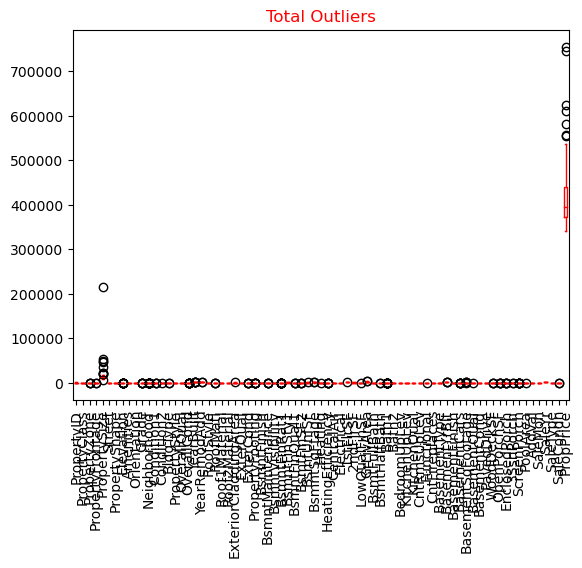

In [ ]:
plt.figure(figsize = (15,3), dpi = 200)
outliers.plot(kind = 'box', color = 'red')
plt.xticks(rotation = 90)
plt.title('Total Outliers', color = 'red')
plt.show()

# Removing Outliers

In [ ]:
df.drop(outliers.index)

,PropertyID,PropertyClass,PropertyZone,PropertyFrontage,PropertySize,Street,PropertyShape,Elevation,Amenities,Orientation,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,AddVal,SaleMon,SaleYr,SaleType,SaleCondn,PropPrice
0,1,60,3,65.0,8450,1,3.0,3.0,0,4.0,...,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,3.0,3.0,0,2.0,...,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0.0,3.0,0,4.0,...,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0.0,3.0,0,0.0,...,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0.0,3.0,0,2.0,...,0,0,0,0,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,3.0,3.0,0,4.0,...,0,0,0,0,0,8,2007,8,4,175000
1456,1457,20,3,85.0,13175,1,3.0,3.0,0,4.0,...,0,0,0,0,0,2,2010,8,4,210000
1457,1458,70,3,66.0,9042,1,3.0,3.0,0,4.0,...,0,0,0,0,2500,5,2010,8,4,266500
1458,1459,20,3,68.0,9717,1,3.0,3.0,0,4.0,...,112,0,0,0,0,4,2010,8,4,142125


In [ ]:
df.head(2)

,PropertyID,PropertyClass,PropertyZone,PropertyFrontage,PropertySize,Street,PropertyShape,Elevation,Amenities,Orientation,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,AddVal,SaleMon,SaleYr,SaleType,SaleCondn,PropPrice
0,1,60,3,65.0,8450,1,3.0,3.0,0,4.0,...,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,3.0,3.0,0,2.0,...,0,0,0,0,0,5,2007,8,4,181500


# Dropping unnecessary columns

In [ ]:
df.drop('PropertyID', axis=1, inplace=True)

# Important Features that influence Property Prices

In [ ]:
df.corr()['PropPrice'].sort_values(ascending= False)[:10]

PropPrice            1.000000
OverallQual          0.790982
GrLivArea            0.708624
BasementCars         0.640409
BasementSqFootage    0.623431
BsmntSqFtage         0.613581
1stFlrSF             0.605852
Bath1                0.560664
CntRmsUpLev          0.533723
YearBuilt            0.522897
Name: PropPrice, dtype: float64

OverallQuality affect Price the most followed by GroundLivingArea, BasementCars, BasementSqFootage and 1stFloorSqFt

# Heatmap for Correlation between Important Features and Price

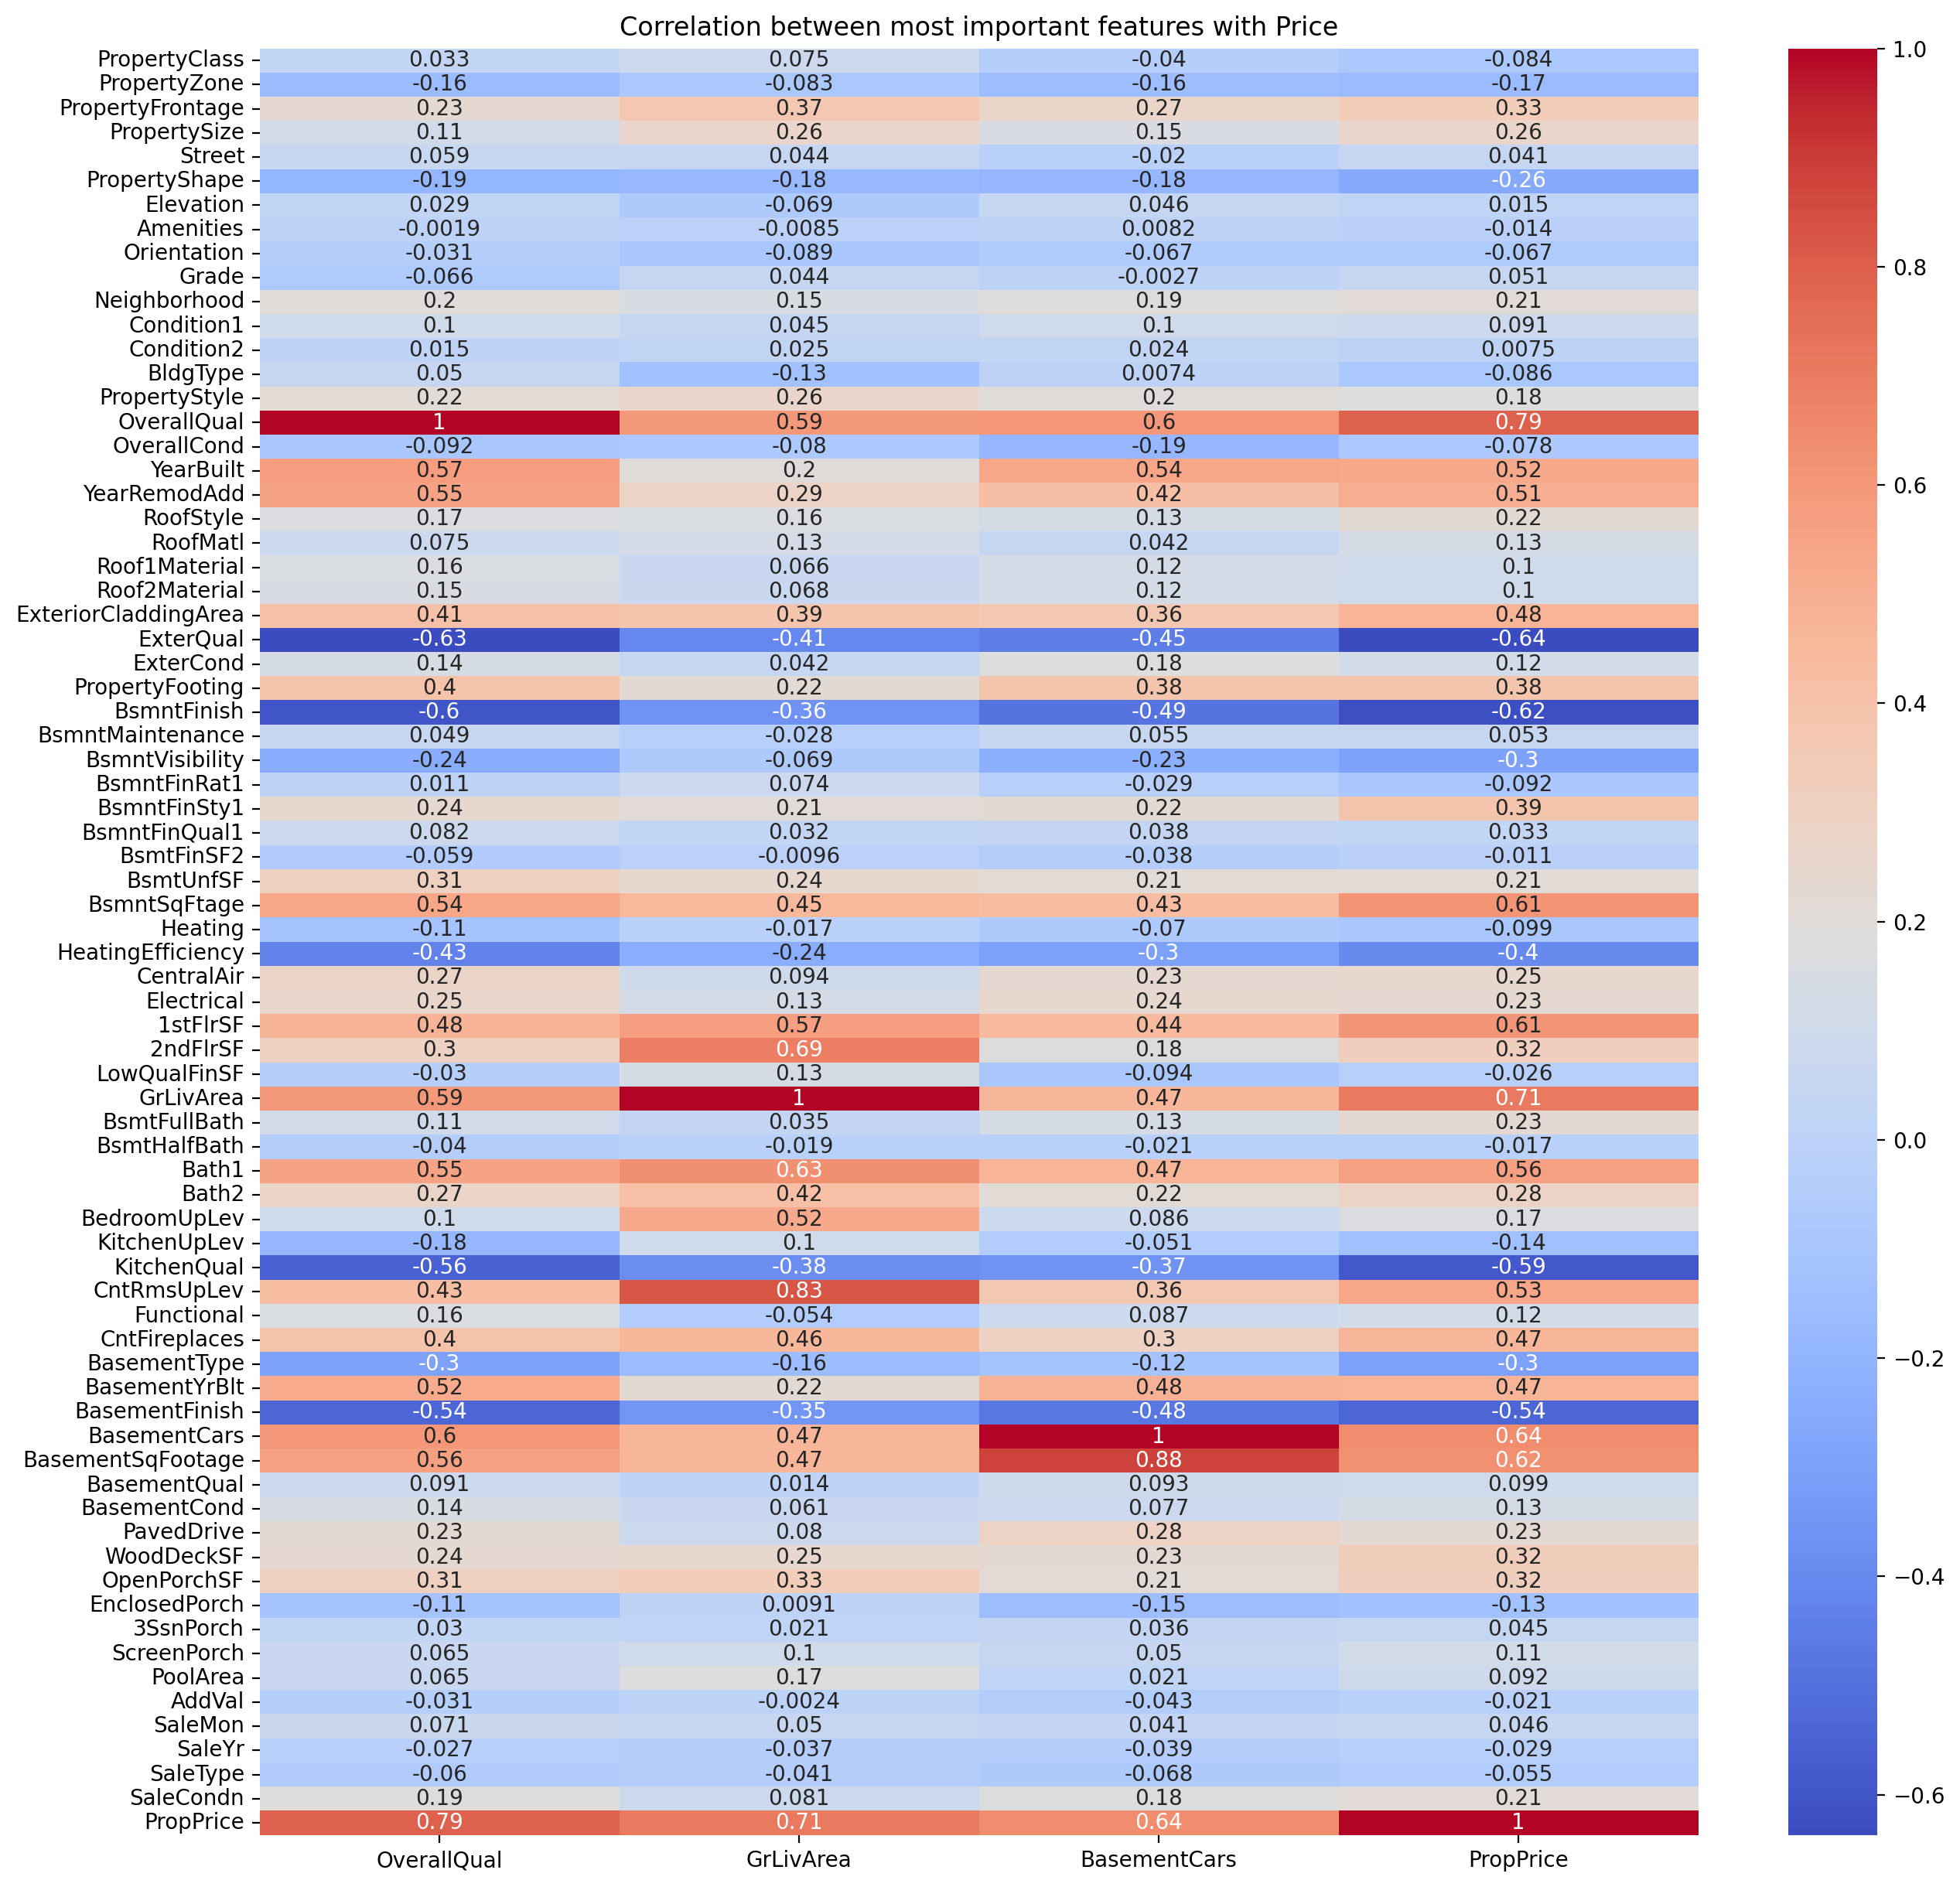

In [ ]:
plt.figure(figsize=(15,15),dpi=200)
sns.heatmap(df.corr(numeric_only=True)[['OverallQual','GrLivArea','BasementCars','PropPrice']],annot=True,cmap='coolwarm')
plt.title('Correlation between most important features with Price')
plt.show()

# Exploratory Data Analysis

# Feature vs. Target

# Swarm Plot for 'OverallQual' and 'PropPrice' with hue as 'OverallQual'

C:\Users\Niti\OneDrive\Documents\Python Scripts\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Niti\OneDrive\Documents\Python Scripts\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Niti\OneDrive\Documents\Python Scripts\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Niti\OneDrive\Documents\Python Scripts\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

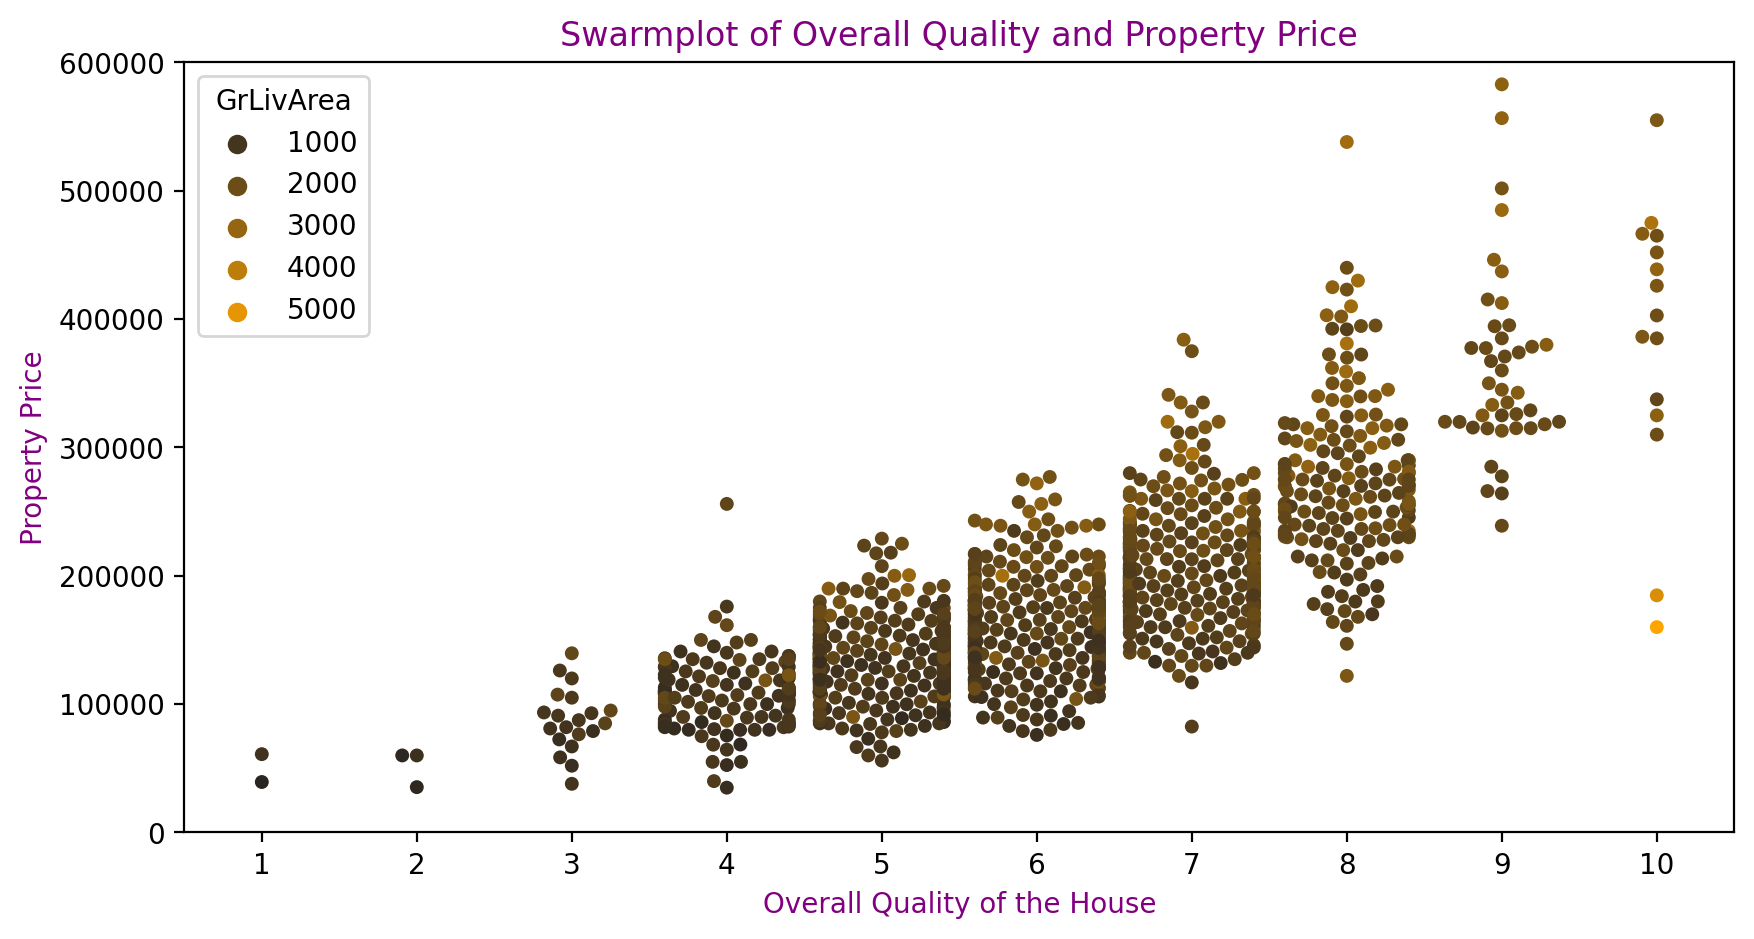

In [ ]:
plt.figure(figsize = (10,5), dpi = 200)
sns.swarmplot(x = 'OverallQual', y = 'PropPrice', data =df, hue = 'GrLivArea',color='orange')
plt.xlabel('Overall Quality of the House', color = 'purple')
plt.ylabel('Property Price', color = 'purple')
plt.ylim(0,600000)
plt.title('Swarmplot of Overall Quality and Property Price', color = 'purple')
plt.show()
import warnings

# Feature vs. Feature

# Kde Plot for 'OverallQual' as Feature and 'GrLivArea' as other Feature with hue as 'SaleCondition'

C:\Users\Niti\AppData\Local\Temp\ipykernel_15900\3100816974.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x = 'OverallQual', y = 'GrLivArea', data = df,hue = 'SaleCondn', levels = 5, color = 'brown', linewidths = 5,
C:\Users\Niti\OneDrive\Documents\Python Scripts\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Niti\OneDrive\Documents\Python Scripts\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Niti\OneDrive\Documents\Python Scripts\Lib\site-packages\seaborn\_oldcore.py:1498: Futu

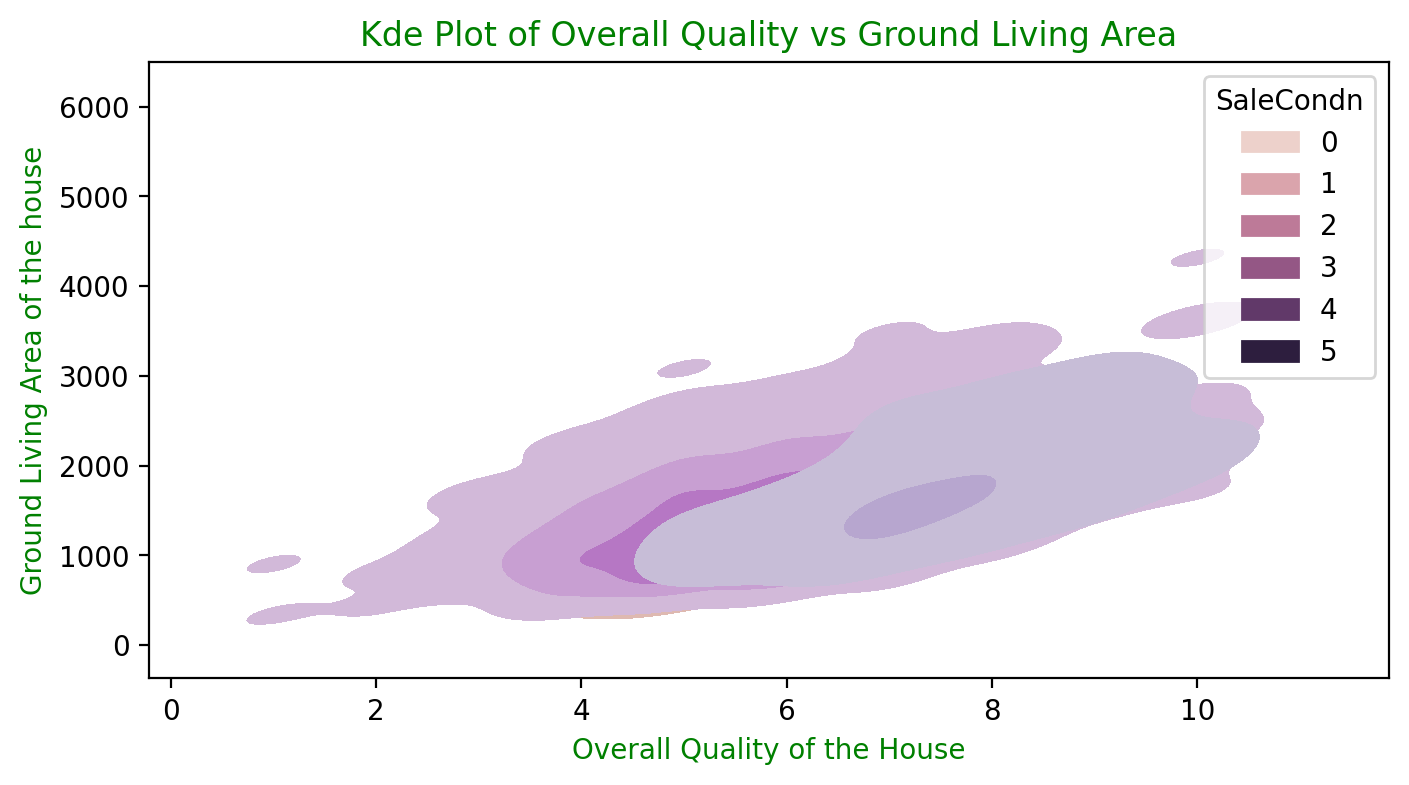

In [ ]:
plt.figure(figsize = (8,4), dpi = 200)
sns.kdeplot(x = 'OverallQual', y = 'GrLivArea', data = df,hue = 'SaleCondn', levels = 5, color = 'brown', linewidths = 5,
            shade = True)
plt.xlabel('Overall Quality of the House', color = 'green')
plt.ylabel('Ground Living Area of the house', color = 'green')
plt.title('Kde Plot of Overall Quality vs Ground Living Area', color = 'green')
plt.show()

# PieChart for 'OverallCond'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


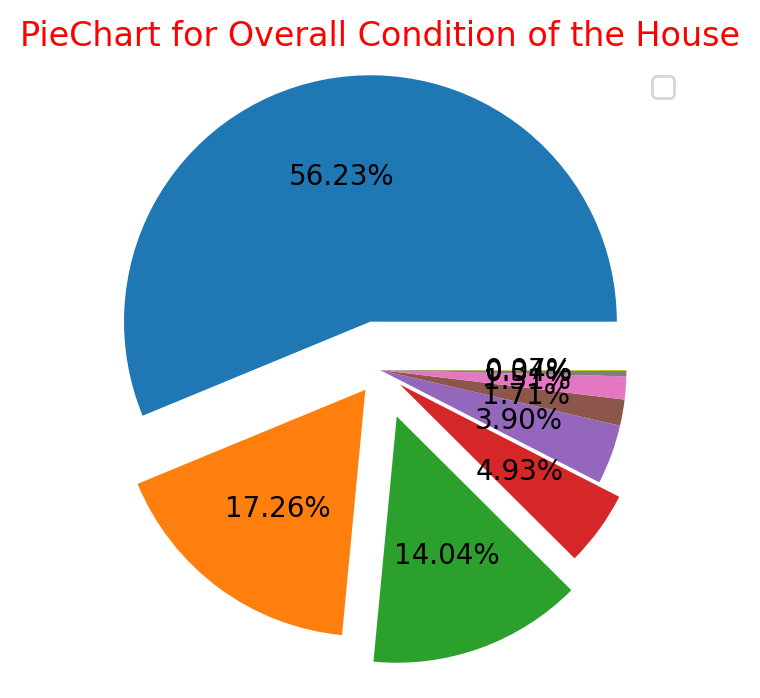

In [ ]:
plt.figure(figsize = (4,4), dpi = 200)
plt.pie(df['OverallCond'].value_counts(), autopct = '%0.2f%%', explode = (0.2,0.1,0.2,0.1,0,0,0,0,0))
plt.title('PieChart for Overall Condition of the House', color = 'red')
plt.legend()
plt.show()

# Scaling and pca

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

In [ ]:
X = df.drop('PropPrice', axis = 1)
y = df.PropPrice

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

rfr = RandomForestRegressor()
rfr.fit(X_train_pca, y_train)


RandomForestRegressor()

In [ ]:
accuracy = rfr.score(X_test_pca, y_test)
accuracy

0.7850388288012945

# Feature Selection

In [ ]:
X = df.drop('PropPrice', axis = 1)
y= df.PropPrice

# Train Test data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression

# Create and train the model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
linearmodel = LinearRegression()

In [ ]:
linearmodel.fit(X_train,y_train)

LinearRegression()

In [ ]:
linearmodel.score(X_test, y_test)

0.8455392005349065

# Score comes out to be almost 85%

In [ ]:
linearmodel.coef_

array([-1.45686981e+02, -2.35294991e+03, -2.29920870e+02,  3.15518545e-01,
        1.94959257e+04, -1.13364041e+03,  3.44495558e+03, -4.89589841e+04,
       -9.48729798e+01,  1.30908481e+04,  4.55709196e+02, -3.46919928e+02,
       -9.90341802e+03, -2.12835164e+03, -1.38007544e+03,  1.16396845e+04,
        4.17439060e+03,  1.78266068e+02,  9.09217679e+01,  2.82579835e+03,
        4.10916407e+03, -1.27821613e+03,  6.26116051e+02,  1.77437093e+01,
       -7.77517106e+03,  5.68428208e+01,  1.18312596e+03, -1.05291982e+04,
        3.85136045e+03, -3.74852204e+03, -7.89777756e+02,  2.56160211e+00,
        7.89000487e+02,  4.04551650e+00, -3.38658207e+00,  3.22053653e+00,
       -1.10532148e+03, -2.87563056e+02,  6.96021059e+02, -4.46930277e+02,
        1.53563148e+01,  1.58531332e+01, -1.04570805e+00,  3.01637400e+01,
        8.56189598e+03, -8.56611387e+02,  2.55549563e+03, -1.05799220e+03,
       -2.29440377e+03, -1.04689853e+04, -9.78195379e+03,  3.38941054e+03,
        4.67584240e+03,  

In [ ]:
linearmodel.intercept_

1149306.5820449404

# Predict the model

In [ ]:
linear_pred = linearmodel.predict(X_test)
#linear_pred

We ll draw a ScatterPlot for True and Predicted values

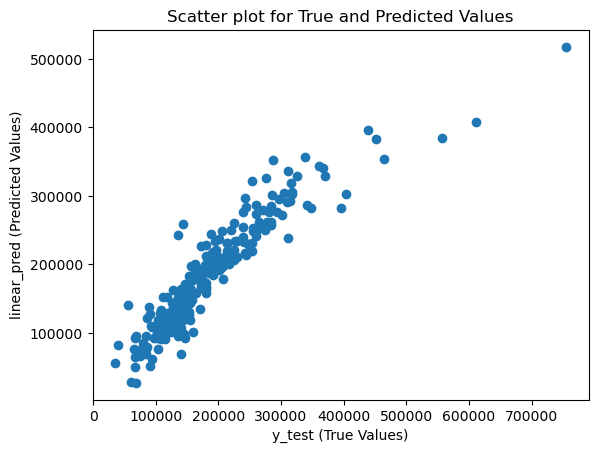

In [ ]:
plt.scatter(y_test, linear_pred)
plt.xlabel('y_test (True Values)')
plt.ylabel('linear_pred (Predicted Values)')
plt.title('Scatter plot for True and Predicted Values')
plt.show()

# Model Evaluation

In [ ]:
df['PropPrice'].mean()

180921.19589041095

C:\Users\Niti\OneDrive\Documents\Python Scripts\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Niti\OneDrive\Documents\Python Scripts\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


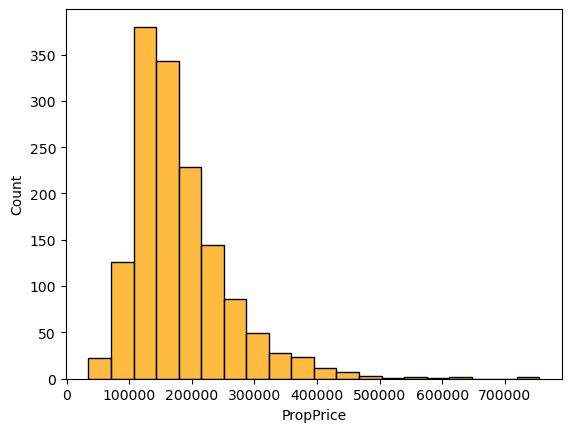

In [ ]:
sns.histplot(data = df, x = 'PropPrice', bins = 20, color = 'orange')
plt.show()

# Histplot shows the maximum number of Property cost between 110000 to 190000.

In [ ]:
mean_absolute_error(y_test, linear_pred)

21461.897535265784

In [ ]:
mean_squared_error(y_test, linear_pred)

1184764718.120182

In [ ]:
# Root mean squared error
np.sqrt(mean_squared_error(y_test, linear_pred))

34420.411358962316

In [ ]:
metrics.explained_variance_score(y_test, linear_pred)

0.8462935305310537

In [ ]:
r2_score(y_test, linear_pred)

0.8455392005349065

# Errors

In [ ]:
test_residuals = y_test - linear_pred
test_residuals

892      3624.626848
1105    -3761.633676
413      3270.798049
522    -18881.898474
1036    -2787.739460
            ...     
479    -47867.575405
1361   -14274.226999
802    -27171.069901
651     -2599.805258
722     23140.562463
Name: PropPrice, Length: 292, dtype: float64

Now we ll draw a ScatterPlot for all these errors

C:\Users\Niti\OneDrive\Documents\Python Scripts\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Niti\OneDrive\Documents\Python Scripts\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<function matplotlib.pyplot.show(close=None, block=None)>

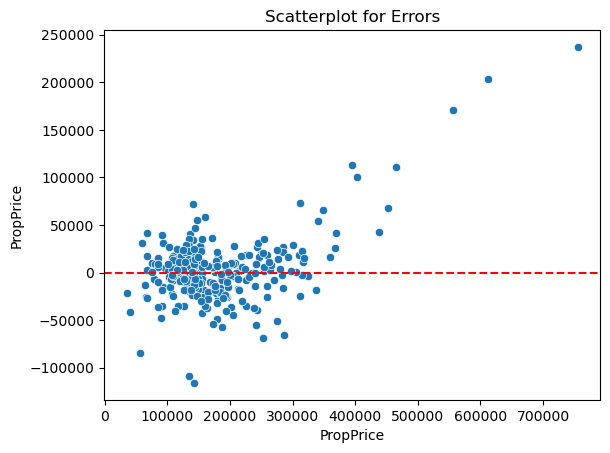

In [ ]:
sns.scatterplot(x = y_test, y = test_residuals)
plt.axhline(y = 0, color = 'r', ls = '--')
plt.title('Scatterplot for Errors')
plt.show

# NO clear line or curve..so we should not use LinearRegression

# Feature Importance Analysis

In [ ]:
X.columns

Index(['PropertyClass', 'PropertyZone', 'PropertyFrontage', 'PropertySize',
       'Street', 'PropertyShape', 'Elevation', 'Amenities', 'Orientation',
       'Grade', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'PropertyStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Roof1Material',
       'Roof2Material', 'ExteriorCladdingArea', 'ExterQual', 'ExterCond',
       'PropertyFooting', 'BsmntFinish', 'BsmntMaintenance', 'BsmntVisibility',
       'BsmntFinRat1', 'BsmntFinSty1', 'BsmntFinQual1', 'BsmtFinSF2',
       'BsmtUnfSF', 'BsmntSqFtage', 'Heating', 'HeatingEfficiency',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'Bath1', 'Bath2',
       'BedroomUpLev', 'KitchenUpLev', 'KitchenQual', 'CntRmsUpLev',
       'Functional', 'CntFireplaces', 'BasementType', 'BasementYrBlt',
       'BasementFinish', 'BasementCars', 'BasementSqFootage', 'Basem

In [ ]:
Coeff_analysis = pd.DataFrame(linearmodel.coef_, X.columns, columns = ['Coeff'])

In [ ]:
Coeff_analysis.sort_values('Coeff', ascending = False)[:10]

,Coeff
Street,19495.925695
Grade,13090.848137
OverallQual,11639.684488
BasementCars,10748.163703
BsmtFullBath,8561.895985
CntFireplaces,5516.236632
Functional,4675.842398
OverallCond,4174.390596
RoofMatl,4109.164071
BsmntMaintenance,3851.360448


Street is the most relevant feature follolwed by Grade and Overall Quality according to Linear Regression

# Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtmodel = DecisionTreeClassifier()

In [ ]:
dtmodel.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
dtmodel.score(X_test, y_test)

0.010273972602739725

Very Bad Score of just 1%

In [ ]:
dt_pred = dtmodel.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
classification_report(y_test, dt_pred)

C:\Users\Niti\OneDrive\Documents\Python Scripts\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Niti\OneDrive\Documents\Python Scripts\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Niti\OneDrive\Documents\Python Scripts\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(res

'              precision    recall  f1-score   support\n\n       35311       0.00      0.00      0.00         1\n       37900       0.00      0.00      0.00         0\n       40000       0.00      0.00      0.00         1\n       55000       0.00      0.00      0.00         0\n       55993       0.00      0.00      0.00         1\n       60000       0.50      1.00      0.67         1\n       64500       0.00      0.00      0.00         1\n       66500       0.00      0.00      0.00         1\n       67000       0.00      0.00      0.00         2\n       68400       0.00      0.00      0.00         1\n       68500       0.00      0.00      0.00         1\n       72500       0.00      0.00      0.00         0\n       75000       0.00      0.00      0.00         1\n       75500       0.00      0.00      0.00         1\n       76000       0.00      0.00      0.00         0\n       76500       0.00      0.00      0.00         0\n       79500       0.00      0.00      0.00         1\n       

In [ ]:
confusion_matrix(y_test, dt_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
dtmodel.feature_importances_

array([0.00992169, 0.0062996 , 0.03427896, 0.0492572 , 0.        ,
       0.01564675, 0.00672912, 0.        , 0.01413643, 0.0028985 ,
       0.02488917, 0.00515422, 0.        , 0.00397611, 0.01621247,
       0.01575769, 0.01438796, 0.02428331, 0.02258805, 0.01200054,
       0.00171807, 0.02244473, 0.01256419, 0.02178526, 0.00730181,
       0.00898084, 0.0092078 , 0.01063425, 0.00424746, 0.0117434 ,
       0.01454785, 0.03038396, 0.00397832, 0.00595319, 0.04301148,
       0.03164358, 0.00171807, 0.01707466, 0.00137446, 0.00386567,
       0.03479895, 0.01889086, 0.        , 0.03903324, 0.01377323,
       0.00349596, 0.00262274, 0.0110144 , 0.01677791, 0.        ,
       0.01005714, 0.02950764, 0.00786762, 0.01202652, 0.01246931,
       0.02511313, 0.00900753, 0.00921424, 0.0400061 , 0.00085904,
       0.        , 0.0038131 , 0.02272293, 0.0272444 , 0.00925817,
       0.00171977, 0.00485642, 0.        , 0.00085904, 0.03081819,
       0.03372388, 0.00894117, 0.01691055])

In [ ]:
pd.DataFrame(index = X.columns, data = dtmodel.feature_importances_,
             columns = ['Feature Importance']).sort_values('Feature Importance', ascending = False)[:10]

,Feature Importance
PropertySize,0.049257
BsmtUnfSF,0.043011
BasementSqFootage,0.040006
GrLivArea,0.039033
1stFlrSF,0.034799
PropertyFrontage,0.034279
SaleYr,0.033724
BsmntSqFtage,0.031644
SaleMon,0.030818
BsmntFinSty1,0.030384


In [ ]:
from sklearn.tree import plot_tree

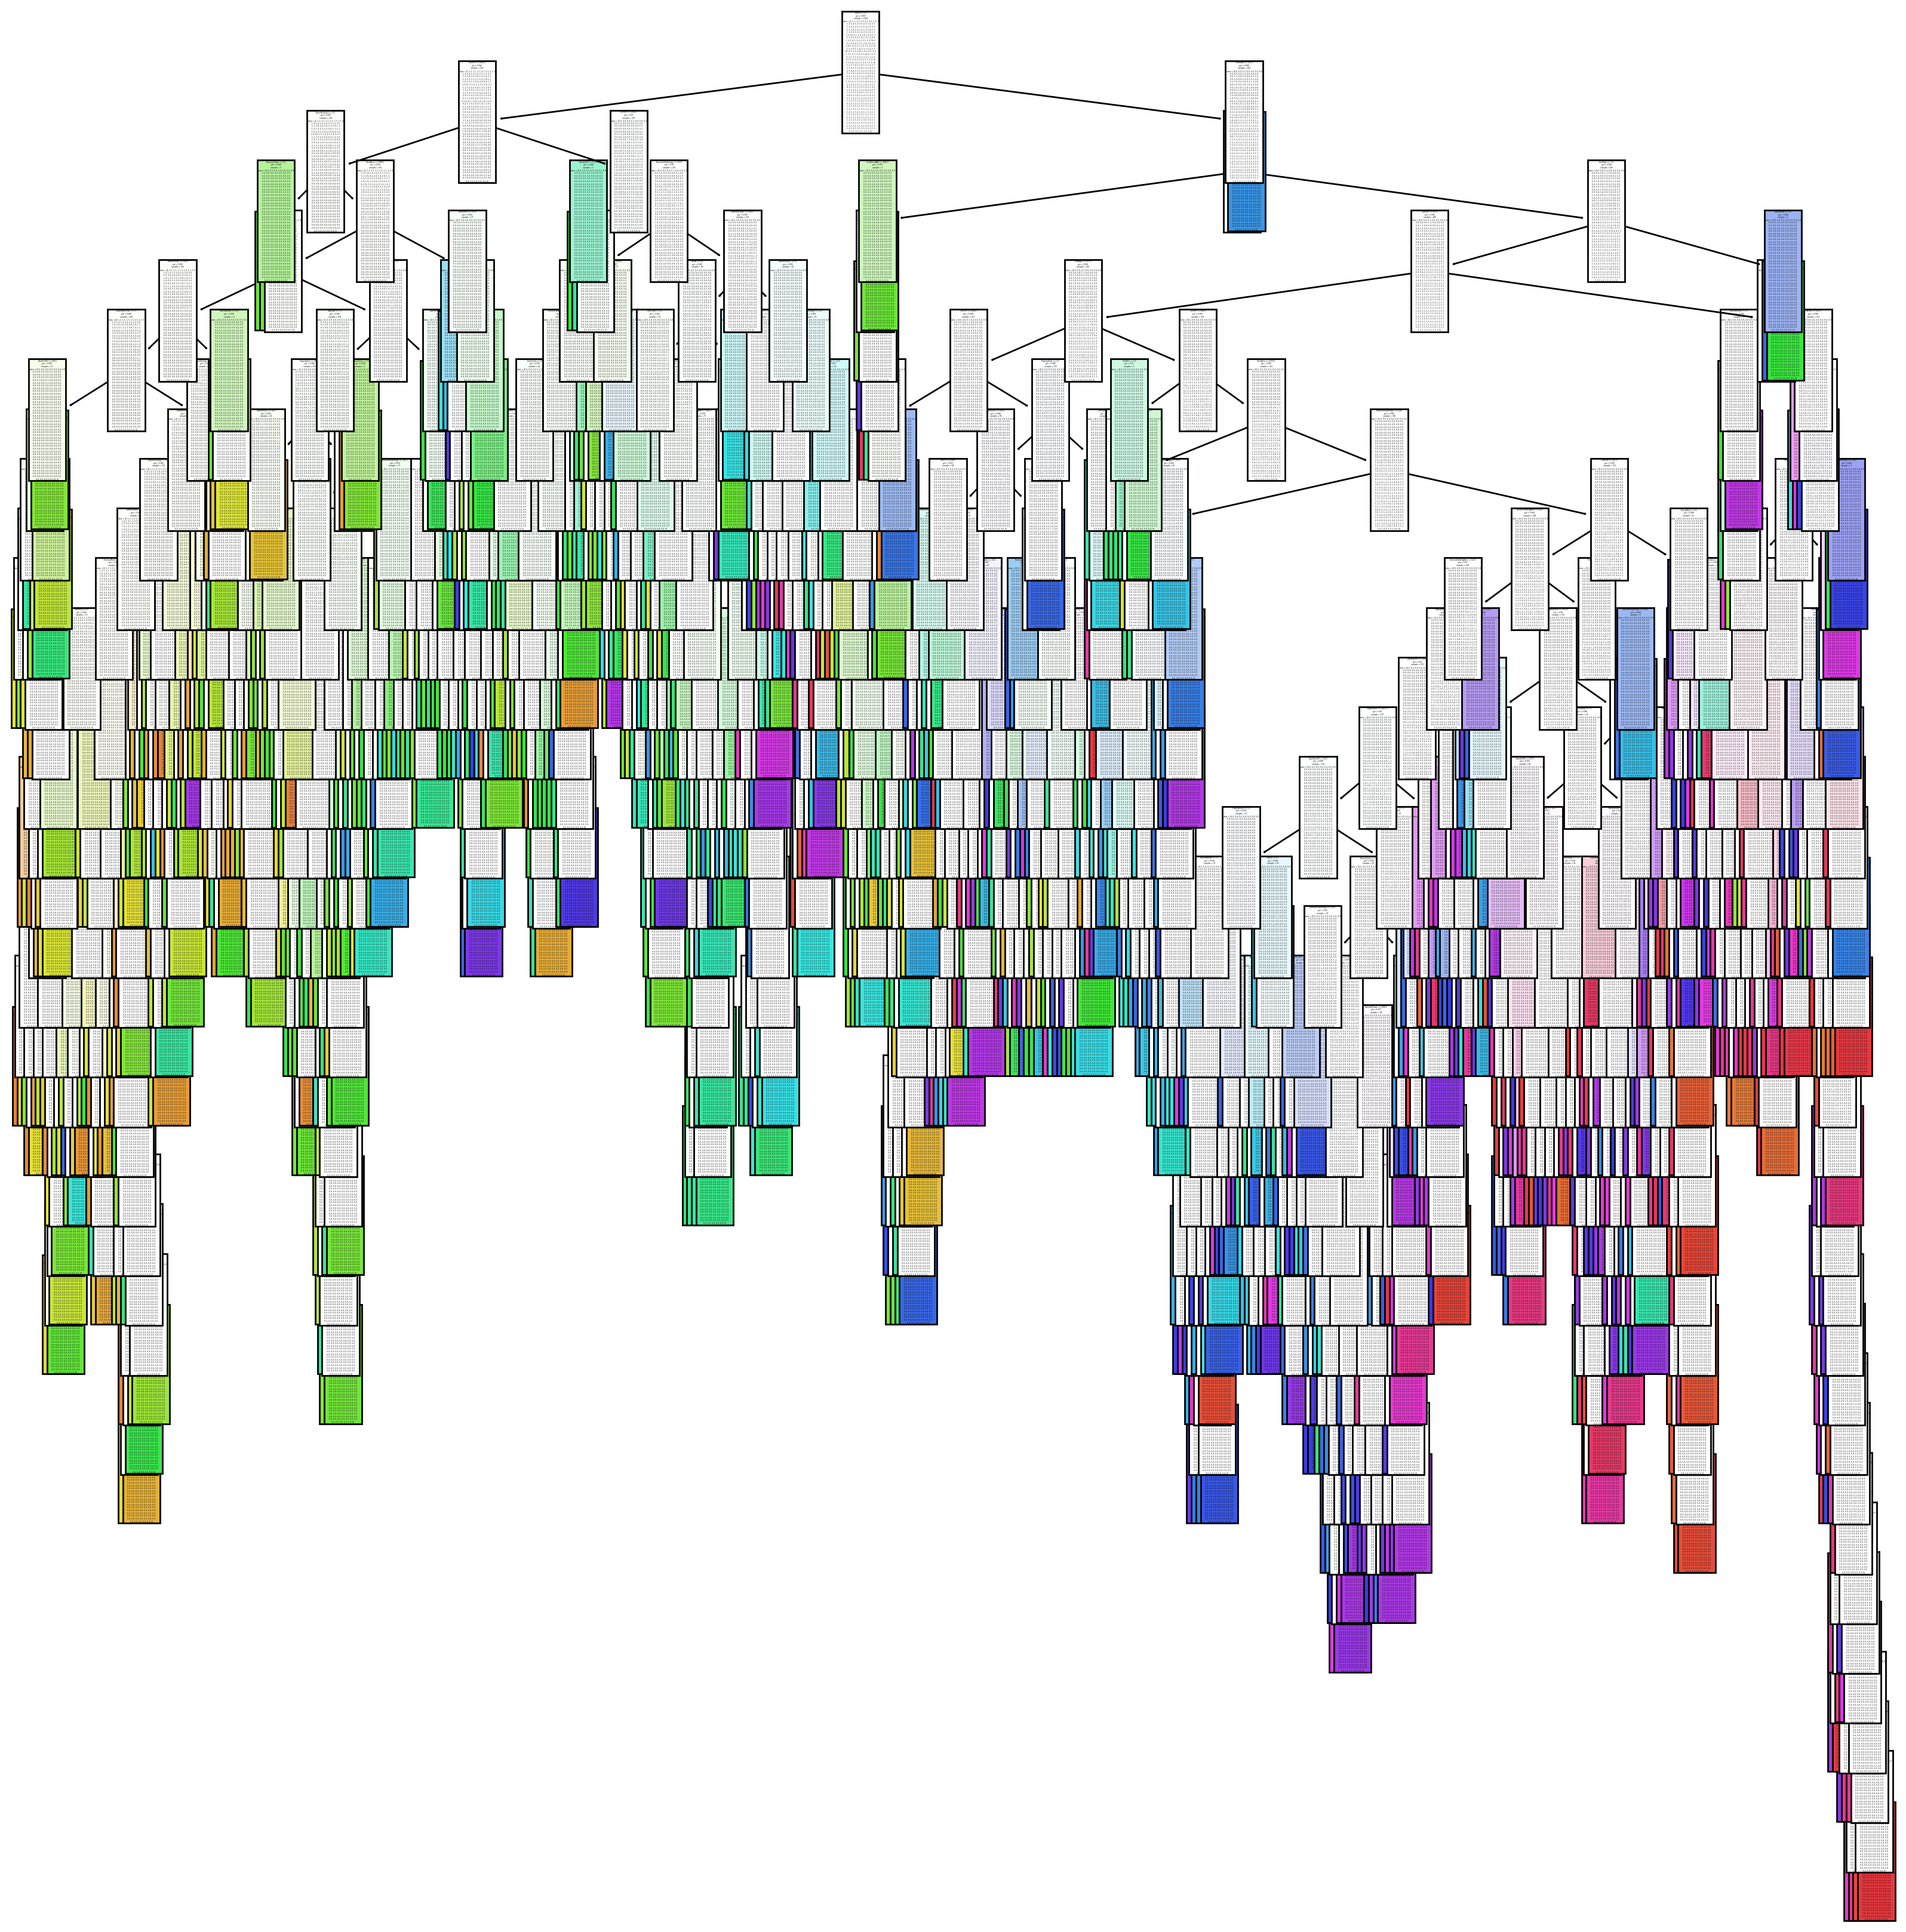

In [ ]:
plt.figure(figsize = (20,20), dpi = 200)
plot_tree(dtmodel, feature_names = X.columns, filled = True);

# Random Forests

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfr = RandomForestRegressor(n_estimators=15, random_state= 42)

In [ ]:
rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=15, random_state=42)

In [ ]:
rfr.score(X_test, y_test)

0.8961689779039974

# Score comes out to be almost 90%. so Random Forests is the best algorithm for this model

In [ ]:
rfr_pred = rfr.predict(X_test)

In [ ]:
rfr.feature_importances_

array([3.11046861e-03, 1.03021485e-03, 5.66470761e-03, 1.79450270e-02,
       4.41521826e-05, 2.05482325e-03, 1.79774247e-03, 0.00000000e+00,
       3.10521446e-03, 5.74780322e-04, 8.05680826e-03, 7.39586447e-04,
       4.61268932e-06, 4.53958558e-04, 7.05953138e-04, 5.71138831e-01,
       4.17656861e-03, 8.65647472e-03, 7.53305506e-03, 7.74154601e-04,
       5.04328534e-05, 8.94973228e-04, 8.96270196e-04, 2.90828781e-03,
       7.28865903e-04, 4.31153469e-04, 3.05257060e-04, 1.30621012e-02,
       7.29380626e-04, 1.66649126e-03, 1.26116214e-03, 2.50446169e-02,
       1.40434768e-03, 1.90795057e-03, 4.78244406e-03, 4.57577280e-02,
       6.66652604e-05, 8.08484972e-04, 4.00458373e-03, 1.14792701e-04,
       2.15669906e-02, 4.43589638e-02, 2.02070180e-05, 1.13180551e-01,
       6.14495459e-04, 1.25236991e-04, 2.02116663e-03, 6.19465766e-04,
       1.58659398e-03, 1.41679059e-03, 2.51365235e-03, 8.04958188e-03,
       7.45870513e-04, 2.89369341e-03, 4.25472352e-03, 6.30931679e-03,
      

In [ ]:
pd.DataFrame(index = X.columns, data = rfr.feature_importances_,
             columns = ['Feature Importance']).sort_values('Feature Importance', ascending = False)[:10]

,Feature Importance
OverallQual,0.571139
GrLivArea,0.113181
BsmntSqFtage,0.045758
2ndFlrSF,0.044359
BsmntFinSty1,0.025045
1stFlrSF,0.021567
PropertySize,0.017945
BasementSqFootage,0.017126
BsmntFinish,0.013062
YearBuilt,0.008656


# Overall Quality is the most effective feature followed by Ground Living Area and Basement Square Footage

# Model loading and final testing

In [ ]:
final_model = RandomForestRegressor(n_estimators=15, random_state= 42)

In [ ]:
final_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=15, random_state=42)

In [ ]:
from joblib import dump, load

In [ ]:
dump(final_model, 'final_price_model.joblib')

['final_price_model.joblib']

In [ ]:
loaded_model = load('final_price_model.joblib')

# Putting some values in all the features for testing purpose and calculating the Price

In [ ]:
input_features = X.head(5)

In [ ]:
predicted_price = loaded_model.predict(input_features).round(decimals=0)
predicted_price

array([209897., 172967., 220200., 147213., 264008.])

In [ ]:
actual_price = y.head(5)
actual_price

0    208500
1    181500
2    223500
3    140000
4    250000
Name: PropPrice, dtype: int64

In [ ]:
pd.DataFrame({'actual_price': actual_price, 'Predicted_price': predicted_price})

,actual_price,Predicted_price
0,208500,209897.0
1,181500,172967.0
2,223500,220200.0
3,140000,147213.0
4,250000,264008.0


# This is giving almost 90% results

C:\Users\Niti\OneDrive\Documents\Python Scripts\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Niti\OneDrive\Documents\Python Scripts\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Niti\OneDrive\Documents\Python Scripts\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'PointPlot for Actual and Predicted price')

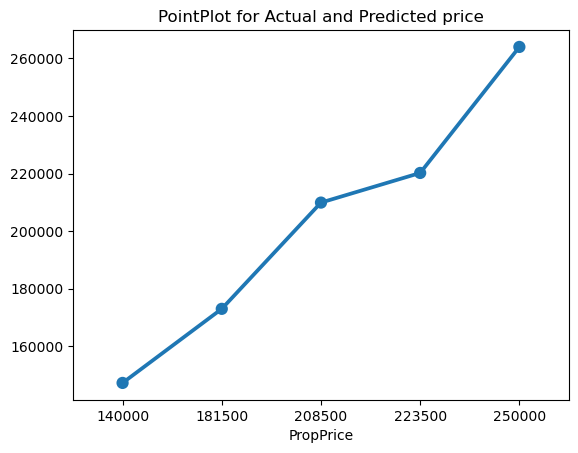

In [ ]:
sns.pointplot(x=actual_price, y = predicted_price)
plt.title('PointPlot for Actual and Predicted price')

# Deployment of model

In [ ]:
from flask import Flask,request, jsonify
import joblib
import pickle

In [ ]:
app = Flask(__name__)

In [ ]:
loaded_model = load('final_price_model.joblib')

In [ ]:
def predict():
    data = request.get_json(force = True)
    features = data['features']
    predictions = loaded_model.predict(features)
    return jsonify (predictions.tolist())
if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\Niti\OneDrive\Documents\Python Scripts\Lib\site-packages\IPython\core\interactiveshell.py:3534: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
